In [2]:
# !pip install --upgrade pandas numexpr bottleneck
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

     ---------------------------------------- 145.0/145.0 kB ? eta 0:00:00
     -------------------------------------- 111.6/111.6 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.3
    Uninstalling numexpr-2.8.3:
      Successfully uninstalled numexpr-2.8.3
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5


In [16]:
data = pd.read_csv("C:/Users/russe/Downloads/4021/1000 iaa/v2_1000_Evaluation Sheet (IAA) w GroundTruths.csv")

In [17]:
data

,cleaned_text,GT. subjective_label,GT. polarity_label
0,im finding binance useful robinhood cant wait ...,1,1
1,hi udear_professional sorry hear youre dealing...,1,1
2,literally best chance keep hounding coinbase f...,1,1
3,amp added coinbase pro well two others,0,2
4,join nexo get btc reward sign start today join...,1,1
...,...,...,...
995,first allwe frickn love binance global busines...,1,1
996,taxable event trade eth staked eth kraken exch...,0,0
997,yeah try binance u customer customer service d...,1,0
998,avid kucoin user hate sign lowtier exchange bu...,1,1


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset (adjust the file path if needed)
file_path = "C:/Users/russe/Downloads/4021/1000 iaa/v2_1000_Evaluation Sheet (IAA) w GroundTruths.csv"
df = pd.read_csv(file_path)

# Display the first few rows (optional)
print(df.head())

# Extract the text and labels
X = df['cleaned_text']
y_subjective = df['GT. subjective_label']    # subjective: 1, objective: 0
y_polarity = df['GT. polarity_label']         # polarity: 1 (positive), 0 (negative), 2 (neutral)

# Split the data into training and testing sets for each classification task
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(X, y_subjective, 
                                                                        test_size=0.2, random_state=42)
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X, y_polarity, 
                                                                    test_size=0.2, random_state=42)

# Create a pipeline for subjectivity classification:
pipeline_subj = Pipeline([
    ('vectorizer', CountVectorizer()),  # converts text to a matrix of token counts
    ('clf', MultinomialNB())              # applies the Multinomial Naive Bayes classifier
])

# Create a pipeline for polarity classification:
pipeline_pol = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', MultinomialNB())
])

# Train the classifiers
pipeline_subj.fit(X_train_subj, y_train_subj)
pipeline_pol.fit(X_train_pol, y_train_pol)

# Make predictions on the test sets
y_pred_subj = pipeline_subj.predict(X_test_subj)
y_pred_pol = pipeline_pol.predict(X_test_pol)

# Evaluate the performance by printing classification reports
print("Subjective Classification Report:")
print(classification_report(y_test_subj, y_pred_subj))

print("Polarity Classification Report:")
print(classification_report(y_test_pol, y_pred_pol))


                                        cleaned_text  GT. subjective_label  \
0  im finding binance useful robinhood cant wait ...                     1   
1  hi udear_professional sorry hear youre dealing...                     1   
2  literally best chance keep hounding coinbase f...                     1   
3             amp added coinbase pro well two others                     0   
4  join nexo get btc reward sign start today join...                     1   

   GT. polarity_label  
0                   1  
1                   1  
2                   1  
3                   2  
4                   1  
Subjective Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.28      0.38        72
           1       0.69      0.89      0.78       128

    accuracy                           0.67       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.65      0.67      0.63       200

Polarity Classification Re

Polarity Classification Report:
              precision    recall  f1-score   support

    Negative       0.57      0.92      0.70       105
     Neutral       0.43      0.10      0.16        61
    Positive       0.47      0.21      0.29        34

    accuracy                           0.55       200
   macro avg       0.49      0.41      0.38       200
weighted avg       0.51      0.55      0.47       200



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

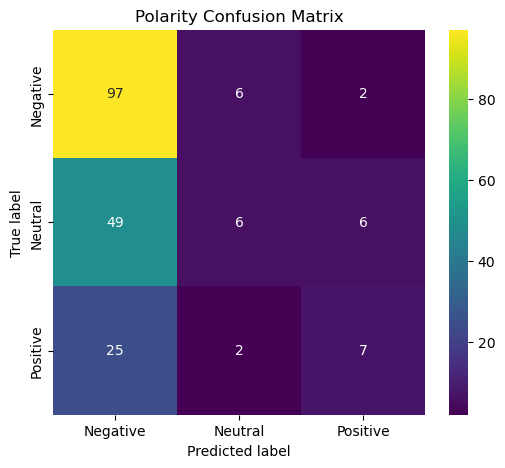

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# 1. Load and inspect dataset
# -----------------------------------------
file_path = "C:/Users/russe/Downloads/4021/1000 iaa/v2_1000_Evaluation Sheet (IAA) w GroundTruths.csv"
df = pd.read_csv(file_path)

# For reference, we have:
#   - df['cleaned_text']: the text
#   - df['GT. polarity_label']: 0=Negative, 1=Positive, 2=Neutral
#   - df['GT. subjective_label']: 0=Objective, 1=Subjective

# -----------------------------------------
# 2. Prepare data for polarity classification
# -----------------------------------------
X = df['cleaned_text']
y_polarity = df['GT. polarity_label']

# Split into training and test sets
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(
    X, 
    y_polarity, 
    test_size=0.2, 
    random_state=42
)

# -----------------------------------------
# 3. Build and train a MultinomialNB pipeline
# -----------------------------------------
pipeline_pol = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', MultinomialNB())
])

pipeline_pol.fit(X_train_pol, y_train_pol)

# -----------------------------------------
# 4. Generate predictions and confusion matrix
# -----------------------------------------
y_pred_pol = pipeline_pol.predict(X_test_pol)

# Calculate confusion matrix
# Reorder the labels so that the rows/columns are in the order:
#  Negative(0), Neutral(2), Positive(1) 
labels = [0, 2, 1] 
cm = confusion_matrix(y_test_pol, y_pred_pol, labels=labels)

# Optional: Print classification report
print("Polarity Classification Report:")
print(classification_report(y_test_pol, y_pred_pol, labels=labels, target_names=["Negative","Neutral","Positive"]))

# -----------------------------------------
# 5. Plot the confusion matrix
# -----------------------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,        # display the raw counts
    fmt='d',           # integer formatting
    cmap='viridis',    # color map (change to your preference)
    xticklabels=["Negative","Neutral","Positive"],
    yticklabels=["Negative","Neutral","Positive"]
)

plt.title("Polarity Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar(label="Number of Samples")
plt.tight_layout()
plt.show()


Subjective Classification Report:
              precision    recall  f1-score   support

   Objective       0.59      0.28      0.38        72
  Subjective       0.69      0.89      0.78       128

    accuracy                           0.67       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.65      0.67      0.63       200



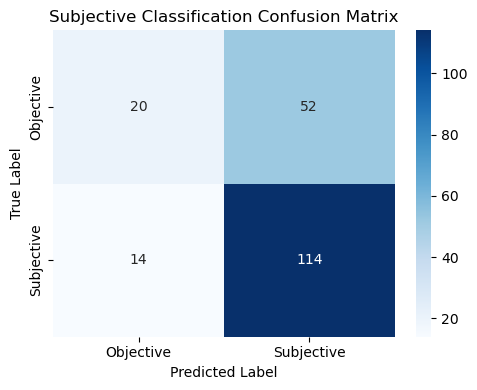

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------------------
# 1. Load the dataset
# -----------------------------------------
file_path = "C:/Users/russe/Downloads/4021/1000 iaa/v2_1000_Evaluation Sheet (IAA) w GroundTruths.csv"
df = pd.read_csv(file_path)

# -----------------------------------------
# 2. Prepare the data for subjective classification
# -----------------------------------------
# "cleaned_text" is the input, and "GT. subjective_label" is the target (0: Objective, 1: Subjective)
X = df['cleaned_text']
y_subjective = df['GT. subjective_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_subjective, test_size=0.2, random_state=42)

# -----------------------------------------
# 3. Create and train the classification pipeline
# -----------------------------------------
pipeline_subjective = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text data into token counts
    ('clf', MultinomialNB())              # Multinomial Naive Bayes classifier
])

pipeline_subjective.fit(X_train, y_train)

# -----------------------------------------
# 4. Generate predictions and compute the confusion matrix
# -----------------------------------------
y_pred = pipeline_subjective.predict(X_test)

# Define the label order explicitly (0: Objective, 1: Subjective)
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Optionally, print a detailed classification report
print("Subjective Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Objective", "Subjective"]))

# -----------------------------------------
# 5. Plot the confusion matrix
# -----------------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(cm,
            annot=True,        # Annotate cells with counts
            fmt='d',           # Format as integers
            cmap='Blues',      # Color map for visualization
            xticklabels=["Objective", "Subjective"],
            yticklabels=["Objective", "Subjective"])
plt.title("Subjective Classification Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Subjective Classification Report:
              precision    recall  f1-score   support

   Objective       0.67      0.22      0.33        72
  Subjective       0.68      0.94      0.79       128

    accuracy                           0.68       200
   macro avg       0.67      0.58      0.56       200
weighted avg       0.68      0.68      0.63       200



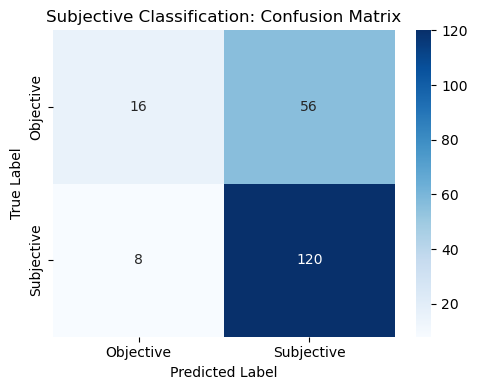

Polarity Classification Report:
              precision    recall  f1-score   support

    Negative       0.63      0.80      0.70       105
    Positive       0.00      0.00      0.00        34
     Neutral       0.48      0.51      0.49        61

    accuracy                           0.57       200
   macro avg       0.37      0.44      0.40       200
weighted avg       0.47      0.57      0.52       200



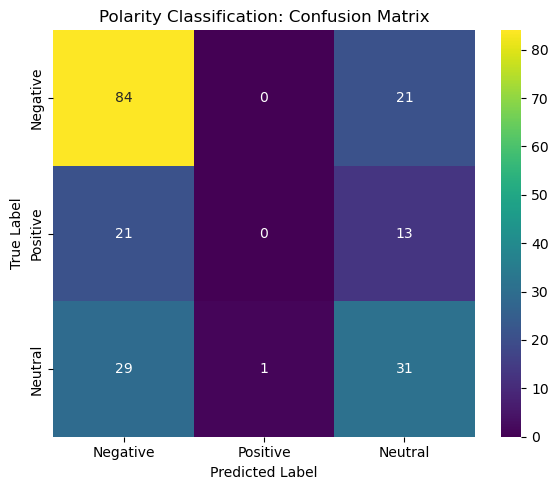

In [22]:
#########################################

#rand forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------------------
# 1. Load the dataset
# -----------------------------------------
file_path = "C:/Users/russe/Downloads/4021/1000 iaa/v2_1000_Evaluation Sheet (IAA) w GroundTruths.csv"
df = pd.read_csv(file_path)

# ------------------------------
# 2. Subjective Classification
# ------------------------------
# "cleaned_text" is the feature; "GT. subjective_label" is the target (0: Objective, 1: Subjective)
X = df['cleaned_text']
y_subjective = df['GT. subjective_label']

# Split the data into training and testing sets (80% train, 20% test)
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(X, y_subjective, test_size=0.2, random_state=42)

# Build a pipeline that vectorizes the text and applies a Random Forest classifier
pipeline_subjective = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))  # you can adjust n_estimators and other params as needed
])

# Train the model
pipeline_subjective.fit(X_train_subj, y_train_subj)

# Make predictions on the test set
y_pred_subj = pipeline_subjective.predict(X_test_subj)

# Output a classification report
print("Subjective Classification Report:")
print(classification_report(y_test_subj, y_pred_subj, target_names=["Objective", "Subjective"]))

# Compute the confusion matrix for subjective classification (labels 0 and 1)
cm_subj = confusion_matrix(y_test_subj, y_pred_subj, labels=[0, 1])
plt.figure(figsize=(5, 4))
sns.heatmap(cm_subj,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=["Objective", "Subjective"],
            yticklabels=["Objective", "Subjective"])
plt.title("Subjective Classification: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# --------------------------
# 3. Polarity Classification
# --------------------------
# "cleaned_text" is the feature; "GT. polarity_label" is the target.
# Assuming the labels are:
#   0 -> Negative, 1 -> Positive, and 2 -> Neutral.
y_polarity = df['GT. polarity_label']

# Split into training and testing sets
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X, y_polarity, test_size=0.2, random_state=42)

# Build a pipeline for polarity classification with Random Forest
pipeline_polarity = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Train the classifier
pipeline_polarity.fit(X_train_pol, y_train_pol)

# Make predictions
y_pred_pol = pipeline_polarity.predict(X_test_pol)

# Output classification report for polarity
print("Polarity Classification Report:")
print(classification_report(y_test_pol, y_pred_pol, target_names=["Negative", "Positive", "Neutral"]))

# Compute the confusion matrix for polarity classification
# Note: Adjust the order of labels if needed. Here we assume the order [0, 1, 2].
cm_pol = confusion_matrix(y_test_pol, y_pred_pol, labels=[0, 1, 2])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_pol,
            annot=True,
            fmt='d',
            cmap='viridis',
            xticklabels=["Negative", "Positive", "Neutral"],
            yticklabels=["Negative", "Positive", "Neutral"])
plt.title("Polarity Classification: Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
